>
> # MaaS Sim tutorial
>
> ## Driver Agent
>
-----

Driver in the MaaSSim is a `process` of `simpy.Environment`. 

It is executed as a sequence of steps `driverEvent`. 

It operates in an infinite loop, waiting for requests and serving them.

Main routine is `VehicleAgent.loop_day` 

Drivers are instantiated from `vechiles` of `inData` while creating MaaSSim simulator.

Defined as a class in `driver.py`

In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import MaaSSim
import MaaSSim.utils
import logging
from MaaSSim.simulators import simulate
from MaaSSim.driver import VehicleAgent, driverEvent
from MaaSSim.data_structures import structures as inData

In [3]:
params = MaaSSim.utils.get_config('../../data/config/default.json')

In [4]:
inData = MaaSSim.utils.load_G(inData, params, stats = True) #
inData = MaaSSim.utils.prep_supply_and_demand(inData, params)  # generate supply and demand
sim = simulate(inData, params = params, _print = False, logger_level = logging.WARNING) 

01-10-20 11:35:46-WARNING-Setting up 1h simulation at 2020-10-01 11:08:46 for 5 vehicles and 20 passengers in Nootdorp, Netherlands
01-10-20 11:35:46-WARNING-simulation time 0.6 s
01-10-20 11:35:46-WARNING-assertion tests for simulation results - passed


## VehicleAgent

In [5]:
self = sim.vehs[3]

/Users/rkucharski/Documents/GitHub/MaaSSim/MaaSSim/visualizations.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['node'] = t.pos


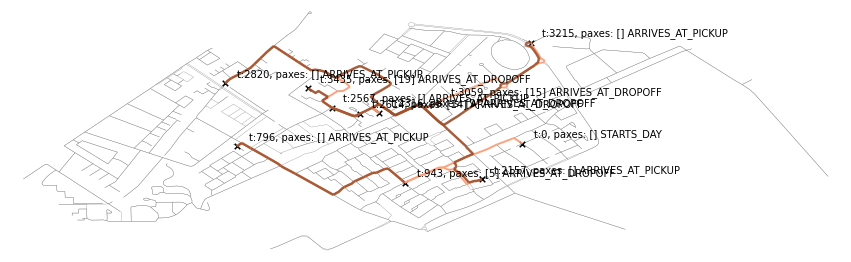

In [6]:
from MaaSSim.visualizations import plot_veh_sim
plot_veh_sim(sim, self.id)

In [7]:
self.id

3

In [8]:
self.veh

pos                           4.50165e+07
event              driverEvent.ENDS_SHIFT
shift_start                             0
shift_end                           86400
platform                                0
expected_income                       NaN
Name: 3, dtype: object

----
#### events 

In [9]:
self.requested = self.sim.env.event() # triggers when vehicle is requested 
self.arrived_at_pick_up = self.sim.env.event() # triggers when vehicle is arrived at pick up
self.arrived = self.sim.env.event() # triggers when vehicle is arrived at destination

----
#### methods
functions from kwargs at the sim level

In [10]:
self.f_driver_learn = self.sim.functions.f_driver_learn  # exit from the system due to prev exp
self.f_driver_out = self.sim.functions.f_driver_out  # exit from the system due to prev exp
self.f_driver_decline = self.sim.functions.f_driver_decline  # reject the incoming request
self.f_driver_repos = self.sim.functions.f_driver_repos  # reposition after you are free again

---------
#### passStatus sequence 

In [11]:
import pandas as pd
pd.DataFrame([[s,s.name,s.value] for s in driverEvent], 
             columns = ['status','name','value'])

,status,name,value
0,driverEvent.STARTS_DAY,STARTS_DAY,0
1,driverEvent.OPENS_APP,OPENS_APP,1
2,driverEvent.RECEIVES_REQUEST,RECEIVES_REQUEST,2
3,driverEvent.ACCEPTS_REQUEST,ACCEPTS_REQUEST,3
4,driverEvent.REJECTS_REQUEST,REJECTS_REQUEST,4
5,driverEvent.IS_ACCEPTED_BY_TRAVELLER,IS_ACCEPTED_BY_TRAVELLER,5
6,driverEvent.IS_REJECTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,6
7,driverEvent.ARRIVES_AT_PICKUP,ARRIVES_AT_PICKUP,7
8,driverEvent.MEETS_TRAVELLER_AT_PICKUP,MEETS_TRAVELLER_AT_PICKUP,8
9,driverEvent.DEPARTS_FROM_PICKUP,DEPARTS_FROM_PICKUP,9


---------
#### report

In [12]:
self.veh.status = driverEvent.STARTS_DAY
pd.DataFrame(self.myrides)

,veh,pos,t,event,paxes
0,3,5.106155e+08,0,STARTS_DAY,[]
1,3,5.106155e+08,0,OPENS_APP,[]
2,3,5.106155e+08,590,RECEIVES_REQUEST,[]
3,3,5.106155e+08,605,ACCEPTS_REQUEST,[]
4,3,5.106155e+08,625,IS_ACCEPTED_BY_TRAVELLER,[]
5,3,4.499514e+07,796,ARRIVES_AT_PICKUP,[]
6,3,4.499514e+07,796,MEETS_TRAVELLER_AT_PICKUP,[]
7,3,4.499514e+07,826,DEPARTS_FROM_PICKUP,[5]
8,3,5.411994e+08,943,ARRIVES_AT_DROPOFF,[5]
9,3,5.411994e+08,2092,RECEIVES_REQUEST,[]


---
(c) Rafał Kucharski, Delft, 2020